In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#changing the working directory
%cd /content/drive/My Drive/SoftComputing/

/content/drive/My Drive/SoftComputing


In [ ]:
#import os
#os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/SoftComputing"

In [ ]:
#download datasets from kaggle
#!kaggle datasets download -d chetankv/dogs-cats-images

 96% 417M/435M [00:18<00:00, 20.2MB/s]
100% 435M/435M [00:18<00:00, 24.8MB/s]


In [ ]:
#unzipping the zip file and deleting the zip file
#!unzip \*.zip  && rm *.zip

### Import Libraries and Modules

In [ ]:
# basic libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
from keras.preprocessing import image
from keras.preprocessing.image import load_img

from sklearn.model_selection import train_test_split

# modeling
from keras import layers
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation


### Load dataset

In [ ]:
train_dir = 'dataset/training_set'
test_dir = 'dataset/test_set'

train_dir_cats = train_dir + '/cats' #storing the cats training images
train_dir_dogs = train_dir + '/dogs' #storing the dogs training images
test_dir_cats = test_dir + '/cats' #storing the cats testing images
test_dir_dogs = test_dir + '/dogs' #storing the dogs testing images

In [ ]:
print('number of cats training images - ', len(os.listdir(train_dir_cats))) #printing the number of cat training images
print('number of dogs training images - ', len(os.listdir(train_dir_dogs))) #printing the number of dog training images
print('number of cats testing images - ', len(os.listdir(test_dir_cats))) #printing the number of cat testing immages
print('number of dogs testing images - ', len(os.listdir(test_dir_dogs))) #printing the number of dog testing images 

number of cats training images -  4000
number of dogs training images -  4000
number of cats testing images -  1000
number of dogs testing images -  1000


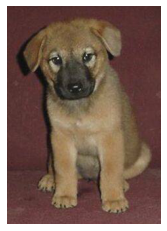

In [ ]:
# display an image from dataset
img = load_img(train_dir_dogs + "/dog.1004.jpg")
plt.axis("off")
plt.imshow(img)

### Data preprocessing

In [ ]:
#accessing all our data both training and testing

# load the training set
batch_size = 64
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir,
    labels = 'inferred',
    batch_size = 64,
    image_size = (224,224),
    shuffle = True,
    seed = 82
)

Found 8000 files belonging to 2 classes.


In [ ]:
# Load the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = test_dir,
    labels = 'inferred',
    batch_size = 64,
    image_size = (224,224),
    shuffle = True,
    seed = 82,
)

Found 2000 files belonging to 2 classes.


In [ ]:
# Class name list generated by image_dataset_from_directory()
train_ds.class_names

['cats', 'dogs']

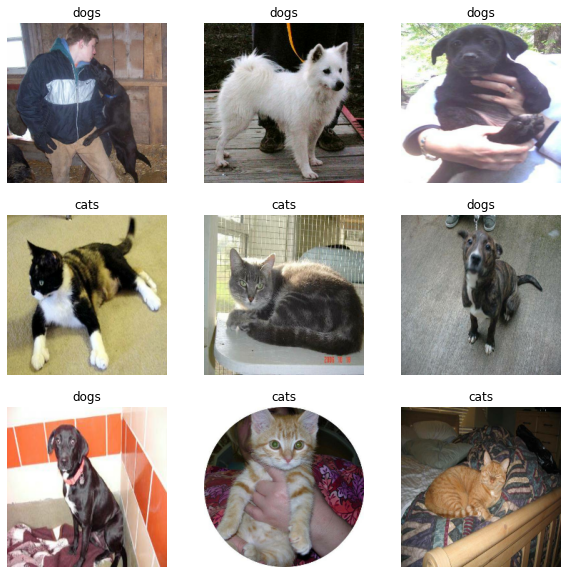

In [ ]:
# Plot out a few of the images and their labels 
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

### Build simple CNN Model

In [ ]:
# Input layer
inputs = keras.Input(shape=[224,224,3])

# Add some Conv2D and BatchNorm layers
x = layers.Conv2D(128, 3)(inputs)
x = layers.BatchNormalization()(x)
x = keras.activations.relu(x)
x = layers.MaxPool2D()(x)
x = layers.Dense(64, activation='relu')(x)

x = layers.Flatten()(x)

# Make a binary output layer with sigmoid activation
outputs = layers.Dense(1, activation='sigmoid')(x)

# Create the model
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# display summary of model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 128)    512       
 ormalization)                                                   
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 222, 222, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 128)    0         
 )                                                               
                                                                 
 dense (Dense)               (None, 111, 111, 64)      8256  

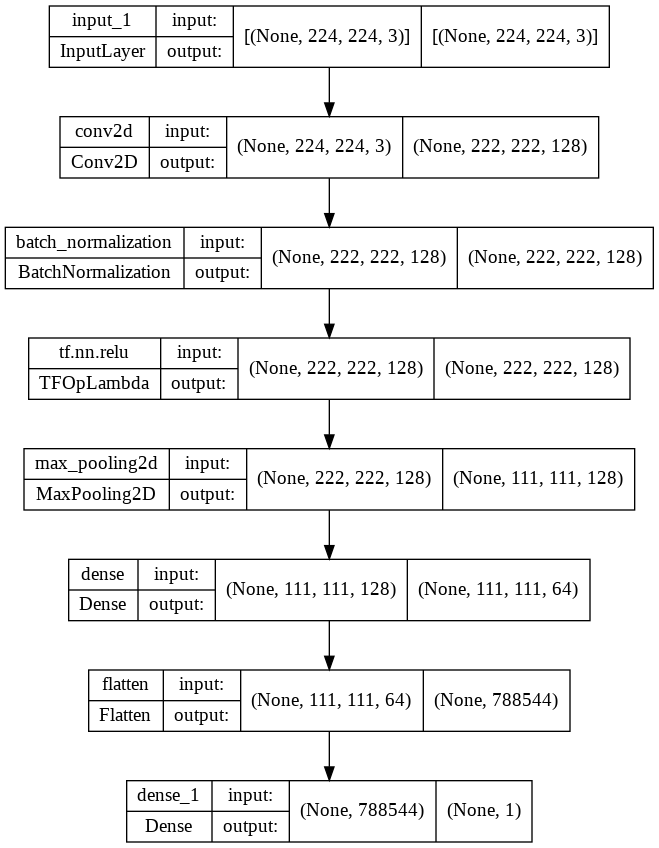

In [ ]:
# plot the model architecture
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
# Use BinaryCrossEntropy as a loss function since this is a binary classification problem
loss = keras.losses.BinaryCrossentropy()

# Use Adam optimizer with default learning rate
optimizer = keras.optimizers.Adam()

# The metric to monitor during training.
metrics = ['accuracy']

In [ ]:
# train model

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

history = model.fit(train_ds, epochs=8, batch_size=64, validation_data = test_ds, verbose=1)

Epoch 1/8
125/125 [==============================] - 782s 6s/step - loss: 3.5166 - accuracy: 0.5997 - val_loss: 0.6564 - val_accuracy: 0.6160
Epoch 2/8
125/125 [==============================] - 40s 309ms/step - loss: 0.5511 - accuracy: 0.7182 - val_loss: 0.6915 - val_accuracy: 0.6330
Epoch 3/8
125/125 [==============================] - 40s 309ms/step - loss: 0.3716 - accuracy: 0.8384 - val_loss: 0.9826 - val_accuracy: 0.6380
Epoch 4/8
125/125 [==============================] - 40s 310ms/step - loss: 0.1719 - accuracy: 0.9436 - val_loss: 0.8189 - val_accuracy: 0.7005
Epoch 5/8
125/125 [==============================] - 40s 311ms/step - loss: 0.0676 - accuracy: 0.9845 - val_loss: 1.2471 - val_accuracy: 0.6630
Epoch 6/8
125/125 [==============================] - 40s 309ms/step - loss: 0.0386 - accuracy: 0.9924 - val_loss: 1.2313 - val_accuracy: 0.6785
Epoch 7/8
125/125 [==============================] - 40s 308ms/step - loss: 0.0187 - accuracy: 0.9966 - val_loss: 1.3810 - val_accuracy: 0

In [ ]:
# save model
keras.models.save_model(model,'CNN_model.h5')

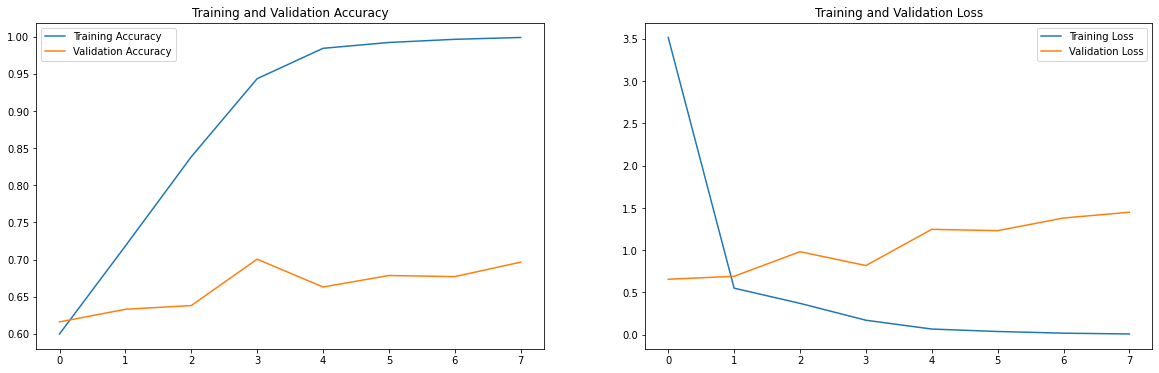

In [ ]:
# plotting training accuracy and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(range(8),acc,label = "Training Accuracy")
plt.plot(range(8),val_acc,label = "Validation Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(8),loss,label = "Training Loss")
plt.plot(range(8),val_loss,label = "Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

In [ ]:
# Load saved CNN model
CNN_model = tf.keras.models.load_model('CNN_model.h5')

# Check its architecture
CNN_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 128)    512       
 ormalization)                                                   
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 222, 222, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 128)    0         
 )                                                               
                                                                 
 dense (Dense)               (None, 111, 111, 64)      8256  

In [ ]:
# evaluate model on testing set
model.evaluate(test_ds, batch_size=64, verbose=2)

32/32 - 5s - loss: 1.4494 - accuracy: 0.6965 - 5s/epoch - 159ms/step


[1.4494127035140991, 0.6965000033378601]

##Transfer learning (EfficientNet)

In [ ]:
# Load the base model
base_model = tf.keras.applications.EfficientNetB0()

# Freeze the existing layers
base_model.trainable = False

21848064/21834768 [==============================] - 0s 0us/step


In [ ]:
# Copy the input layer from the pretrained model to use as our input layer
inputs = base_model.layers[0].input

# Get all base model layers except the last two
outputs = base_model.layers[-2].output

# Add our final classification (output) layer
outputs = layers.Dense(1, activation='sigmoid')(outputs)

# Create the model
model2 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# Use the same loss, opt and metrics
loss = keras.losses.BinaryCrossentropy()
optimizer = keras.optimizers.Adam()
metrics = ['accuracy']

In [ ]:
# train model 
model2.compile(optimizer=optimizer, loss=loss, metrics=metrics)
fitted_model = model2.fit(train_ds, epochs=8, batch_size=64, validation_data=test_ds, verbose=1)

Epoch 1/8
125/125 [==============================] - 58s 253ms/step - loss: 0.1797 - accuracy: 0.9484 - val_loss: 0.0697 - val_accuracy: 0.9865
Epoch 2/8
125/125 [==============================] - 25s 194ms/step - loss: 0.0579 - accuracy: 0.9850 - val_loss: 0.0471 - val_accuracy: 0.9885
Epoch 3/8
125/125 [==============================] - 32s 248ms/step - loss: 0.0441 - accuracy: 0.9877 - val_loss: 0.0388 - val_accuracy: 0.9890
Epoch 4/8
125/125 [==============================] - 28s 213ms/step - loss: 0.0388 - accuracy: 0.9872 - val_loss: 0.0349 - val_accuracy: 0.9900
Epoch 5/8
125/125 [==============================] - 25s 193ms/step - loss: 0.0323 - accuracy: 0.9899 - val_loss: 0.0327 - val_accuracy: 0.9895
Epoch 6/8
125/125 [==============================] - 29s 223ms/step - loss: 0.0317 - accuracy: 0.9894 - val_loss: 0.0312 - val_accuracy: 0.9895
Epoch 7/8
125/125 [==============================] - 25s 195ms/step - loss: 0.0282 - accuracy: 0.9908 - val_loss: 0.0302 - val_accuracy:

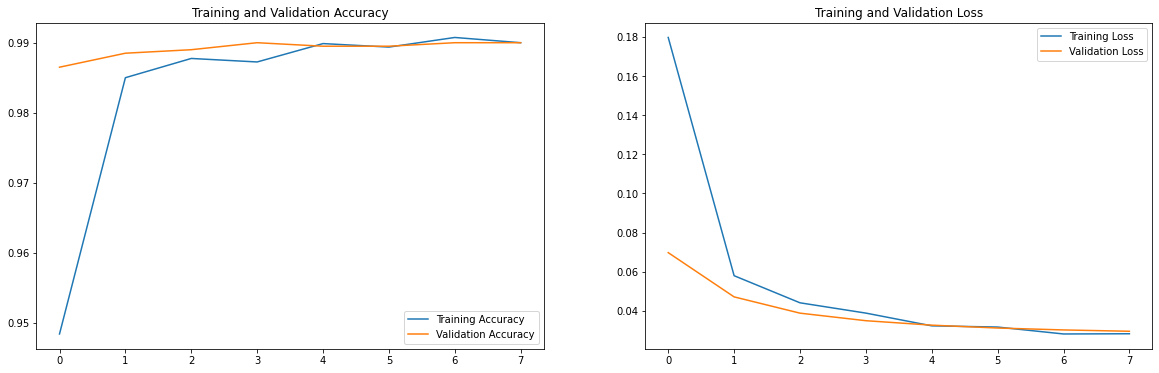

In [ ]:
# plotting training accuracy and validation accuracy
eff_acc = fitted_model.history['accuracy']
eff_val_acc = fitted_model.history['val_accuracy']
eff_loss = fitted_model.history['loss']
eff_val_loss = fitted_model.history['val_loss']

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(range(8),eff_acc,label = "Training Accuracy")
plt.plot(range(8),eff_val_acc,label = "Validation Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(8),eff_loss,label = "Training Loss")
plt.plot(range(8),eff_val_loss,label = "Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

In [ ]:
# save model
keras.models.save_model(model2,'eff_model.h5')

In [ ]:
# load model
eff_model = tf.keras.models.load_model('eff_model.h5')

# Check its architecture
eff_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0]']      

In [ ]:
# Evaluate the restored model
eff_model.evaluate(test_ds, verbose=2)

#print(eff_model.predict(test_ds).shape)

32/32 - 8s - loss: 0.0271 - accuracy: 0.9900 - 8s/epoch - 241ms/step
(2000, 1)


## Testing the model to predict real image

In [ ]:
# testing the model
def testing_image(image_directory):
    test_image = image.load_img(image_directory)
    test_image = test_image.resize((224,224))
    test_image = np.asarray(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = eff_model.predict(test_image)
    animal_dict = {0:'Cat', 1:'Dog'}
    predicted = animal_dict[round(result[0][0])]

    return predicted

Cat


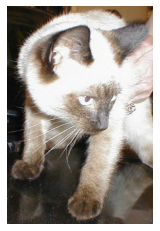

In [ ]:
# predict image is dog or cat
test_img_dir = test_dir + "/cats/cat.4009.jpg"
test_img = load_img(test_img_dir)
plt.axis("off")
plt.imshow(test_img)
print(testing_image(test_img_dir))